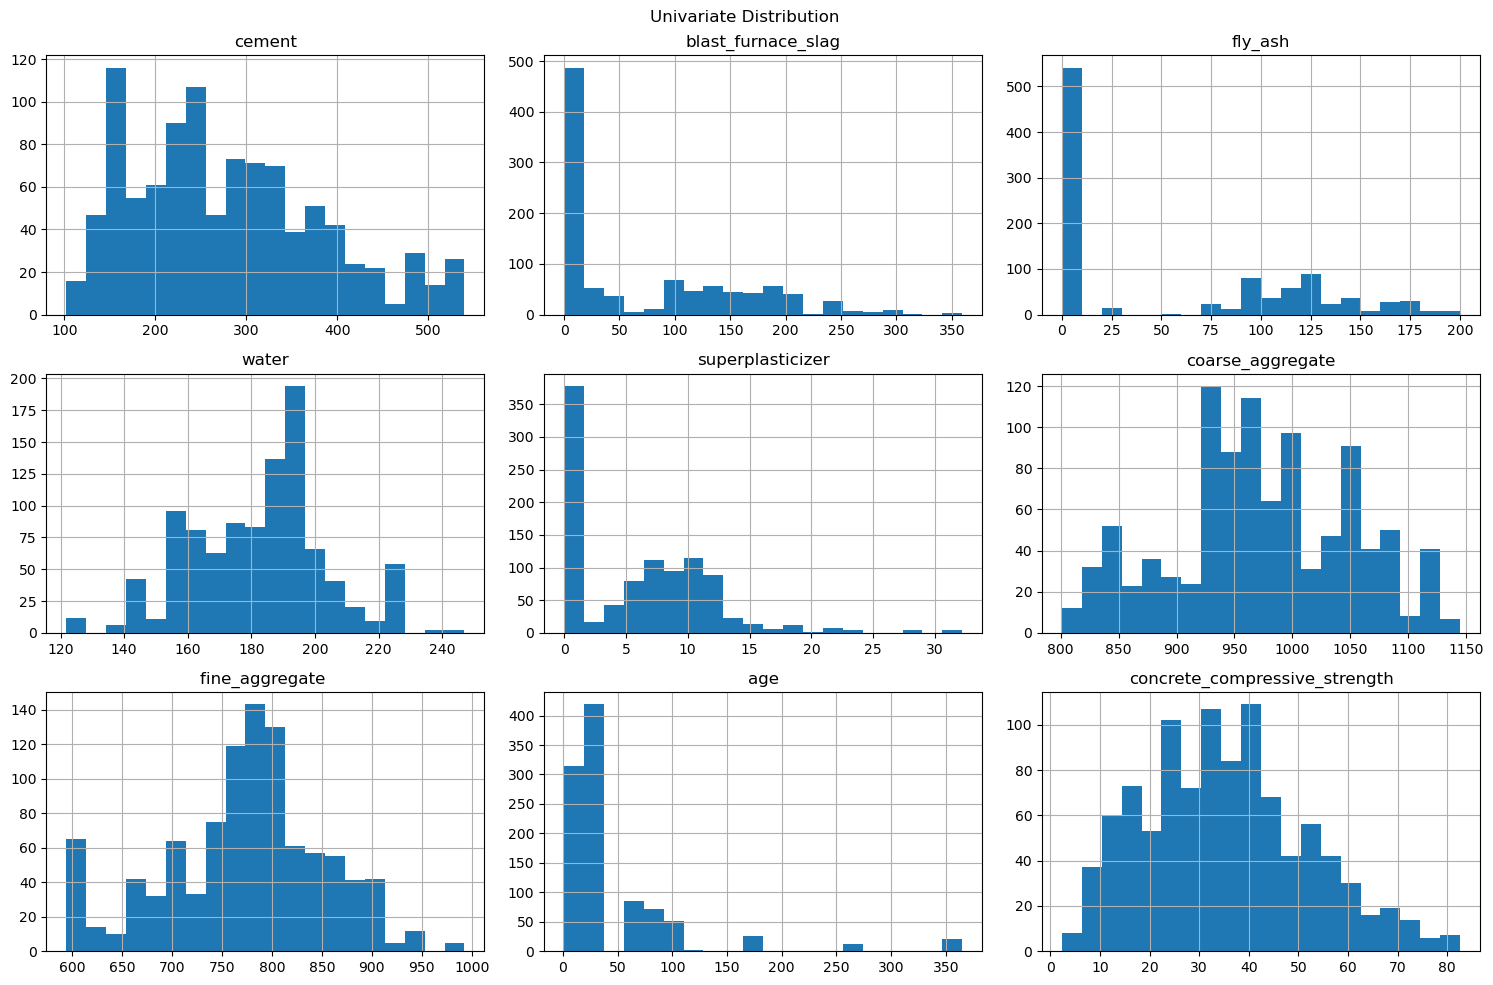

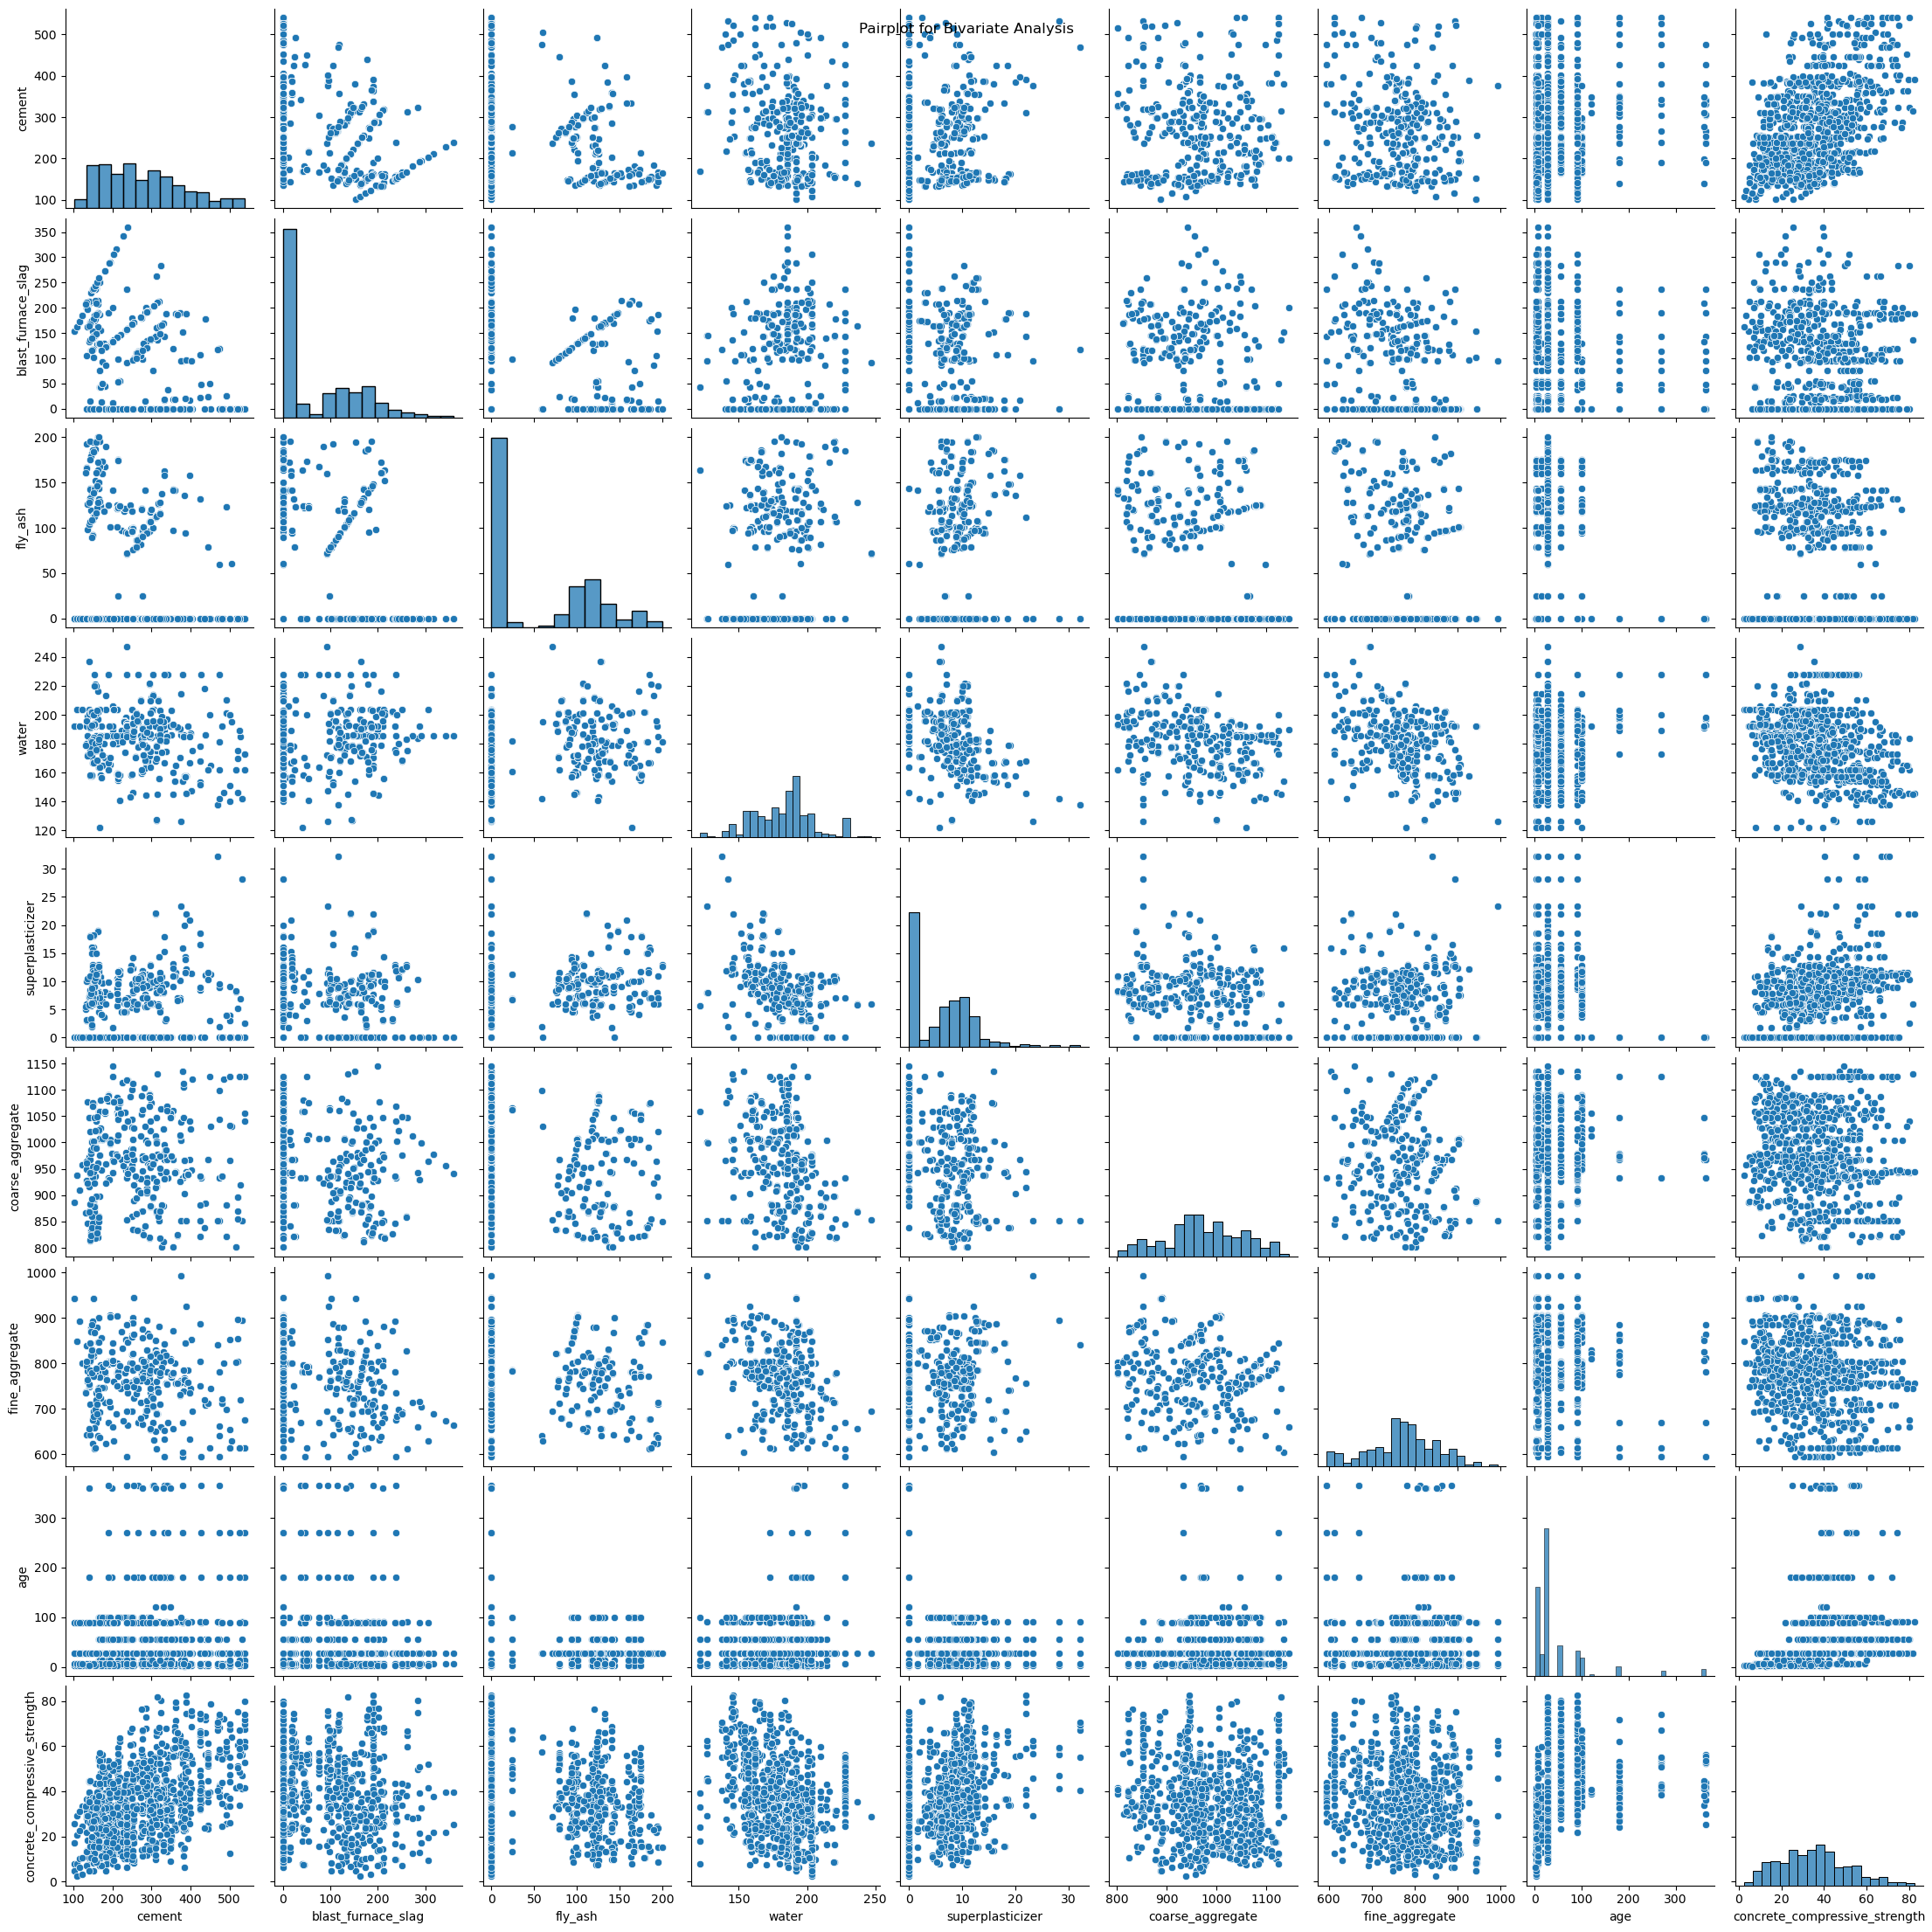

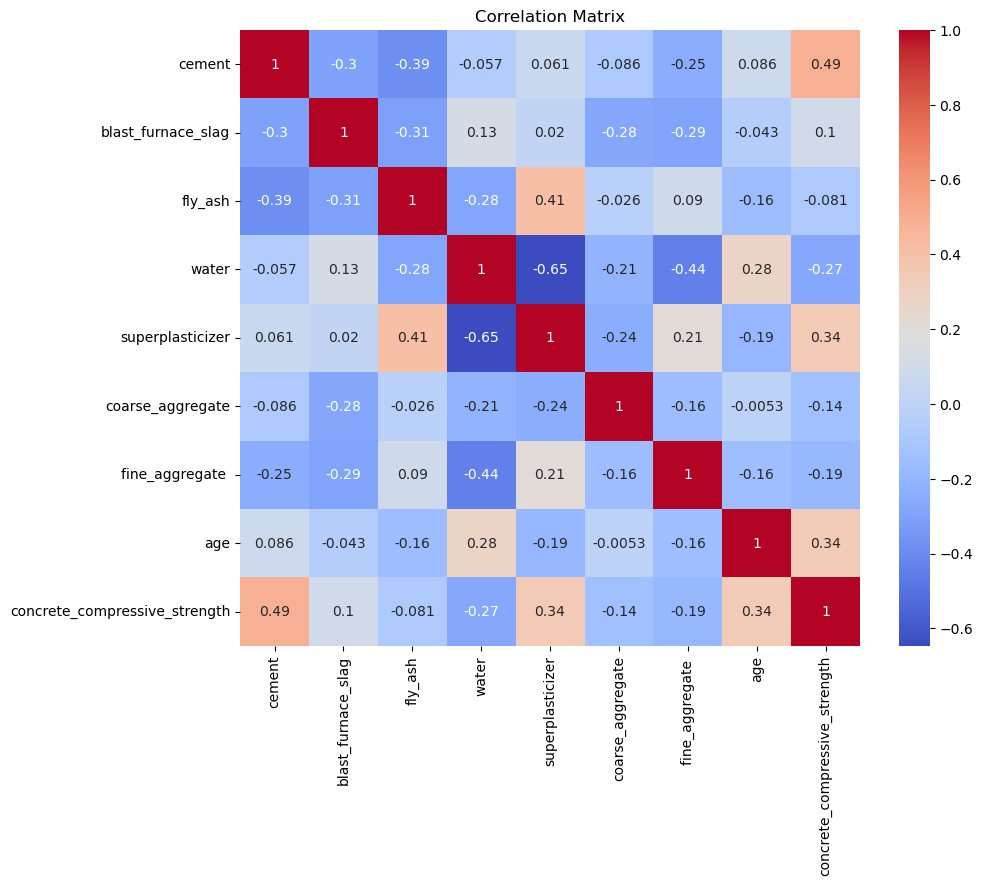

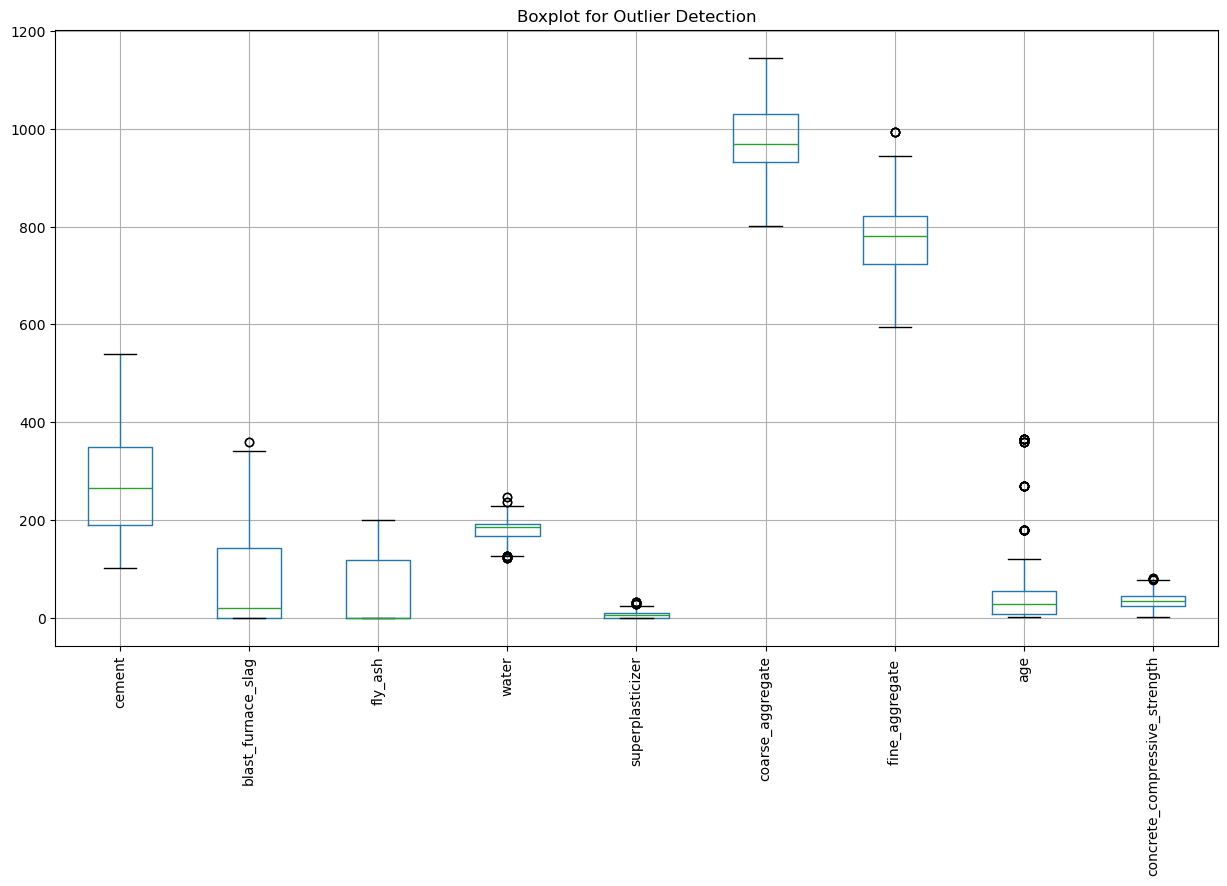

Skewness and Kurtosis:

cement: Skewness=0.56, Kurtosis=-0.44
blast_furnace_slag: Skewness=0.85, Kurtosis=-0.41
fly_ash: Skewness=0.50, Kurtosis=-1.37
water: Skewness=0.03, Kurtosis=0.16
superplasticizer: Skewness=0.98, Kurtosis=1.68
coarse_aggregate: Skewness=-0.07, Kurtosis=-0.59
fine_aggregate : Skewness=-0.25, Kurtosis=-0.11
age: Skewness=3.25, Kurtosis=11.90
concrete_compressive_strength: Skewness=0.40, Kurtosis=-0.31

Linear Regression Evaluation:
MAE: 8.90
MSE: 125.25
RMSE: 11.19
R2 Score: 0.58
Adjusted R2 Score: 0.56


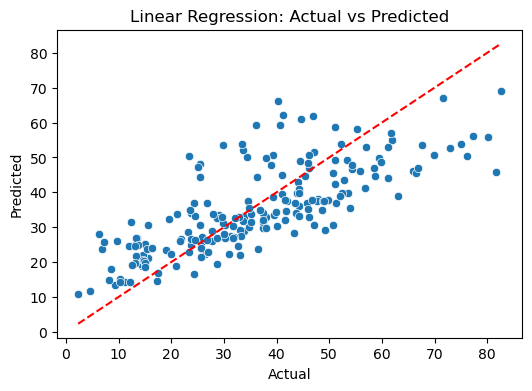

   Actual  Predicted  Difference
0   19.01  23.460192   -4.450192
1   24.29  16.703043    7.586957
2   26.32  22.452090    3.867910
3   34.57  37.396243   -2.826243
4   44.13  42.885008    1.244992

Decision Tree Evaluation:
MAE: 3.76
MSE: 35.00
RMSE: 5.92
R2 Score: 0.88
Adjusted R2 Score: 0.88


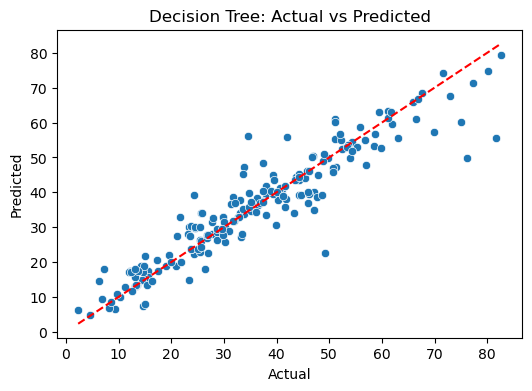

   Actual  Predicted  Difference
0   19.01      19.01        0.00
1   24.29      22.35        1.94
2   26.32      17.96        8.36
3   34.57      56.10      -21.53
4   44.13      44.09        0.04

Random Forest Evaluation:
MAE: 3.50
MSE: 27.62
RMSE: 5.26
R2 Score: 0.91
Adjusted R2 Score: 0.90


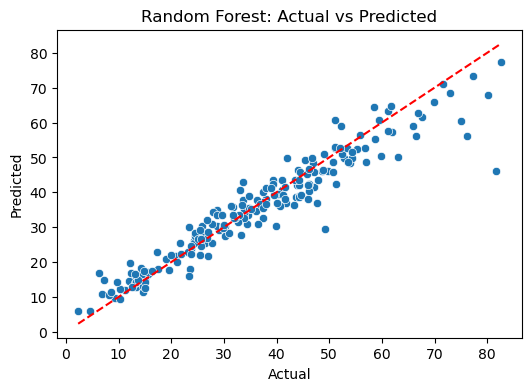

   Actual  Predicted  Difference
0   19.01   21.00760    -1.99760
1   24.29   25.97810    -1.68810
2   26.32   25.60900     0.71100
3   34.57   33.47898     1.09102
4   44.13   46.32160    -2.19160

Support Vector Machine Evaluation:
MAE: 8.34
MSE: 119.31
RMSE: 10.92
R2 Score: 0.60
Adjusted R2 Score: 0.58


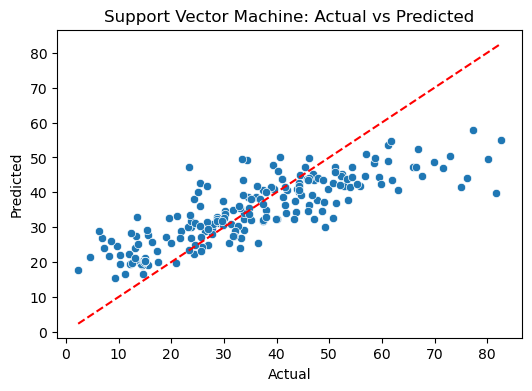

   Actual  Predicted  Difference
0   19.01  27.206500   -8.196500
1   24.29  22.239994    2.050006
2   26.32  28.890795   -2.570795
3   34.57  38.534342   -3.964342
4   44.13  40.804420    3.325580

K Nearest Neighbors Evaluation:
MAE: 7.14
MSE: 84.75
RMSE: 9.21
R2 Score: 0.72
Adjusted R2 Score: 0.70


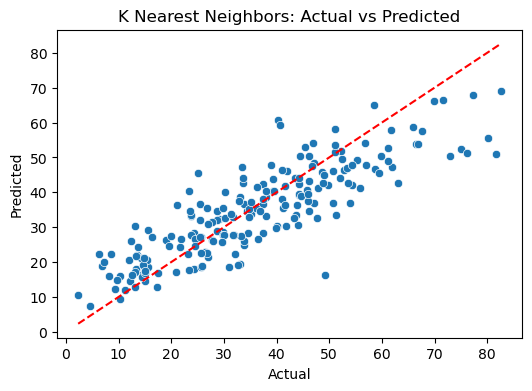

   Actual  Predicted  Difference
0   19.01     26.404      -7.394
1   24.29     18.092       6.198
2   26.32     22.982       3.338
3   34.57     28.344       6.226
4   44.13     30.588      13.542

Cross Validation Scores (5-Fold):
Linear Regression: Mean R2 = 0.48, Std = 0.09
Decision Tree: Mean R2 = 0.20, Std = 0.84
Random Forest: Mean R2 = 0.32, Std = 0.84
Support Vector Machine: Mean R2 = 0.05, Std = 0.11
K Nearest Neighbors: Mean R2 = 0.26, Std = 0.20

Conclusion:
Based on evaluation metrics and cross-validation scores, compare models.
Random Forest and Support Vector Machine often perform best in this kind of regression task.


In [ ]:
# 1. Problem Statement
# Predict the compressive strength of concrete using its composition and age.

# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# 3. Load dataset
df = pd.read_csv('./Data/concrete_data.csv')

# 4. Data cleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 5. EDA
# Univariate analysis
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Distribution")
plt.tight_layout()
plt.show()

# Bivariate analysis
sns.pairplot(df)
plt.suptitle("Pairplot for Bivariate Analysis")
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 6. Outlier treatment with boxplots
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

# 7. Check distribution and apply transformations if necessary
from scipy.stats import skew, kurtosis

print("Skewness and Kurtosis:\n")
for column in df.columns:
    print(f"{column}: Skewness={skew(df[column]):.2f}, Kurtosis={kurtosis(df[column]):.2f}")

# Optional: Apply log/sqrt transformations (example for skewed columns)
# df['Superplasticizer'] = np.log1p(df['Superplasticizer'])

# 8. Feature engineering
# No categorical variables in this dataset, so no encoding needed
# Example of creating new features (optional):
# df['Cement_to_Water'] = df['Cement'] / (df['Water'] + 1)

# 9. Split data into train/test sets
X = df.drop('concrete_compressive_strength', axis=1)
y = df['concrete_compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10-15. Train Linear Regression model & evaluate
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Evaluation:")
    print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")
    r2 = metrics.r2_score(y_test, y_pred)
    print(f"R2 Score: {r2:.2f}")
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    print(f"Adjusted R2 Score: {adj_r2:.2f}")

    # Visualize actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Actual vs Predicted")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.show()

    # Print actual vs predicted difference
    diff = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred, 'Difference': y_test.values - y_pred})
    print(diff.head())

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'K Nearest Neighbors': KNeighborsRegressor()
}

for name, model in models.items():
    evaluate_model(model, name)

# 17. Cross Validation
print("\nCross Validation Scores (5-Fold):")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: Mean R2 = {scores.mean():.2f}, Std = {scores.std():.2f}")

# 18. Final Conclusion
print("\nConclusion:")
print("Based on evaluation metrics and cross-validation scores, compare models.")
print("Random Forest and Support Vector Machine often perform best in this kind of regression task.")
